<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/jax%E7%89%9B%E9%A0%93%E6%B3%95_%E8%A7%A3%E6%B1%BA%E7%BD%90%E9%A0%AD%E8%A3%BD%E9%80%A0cost%E6%9C%80%E5%B0%8F%E5%8C%96%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap,linear_util
from jax import random
from jax import jacfwd, jacrev
from jax.numpy import linalg
import matplotlib.pyplot as plt
from numpy import nanargmin,nanargmax 
from math import pi
from tqdm import tqdm_notebook as tqdm

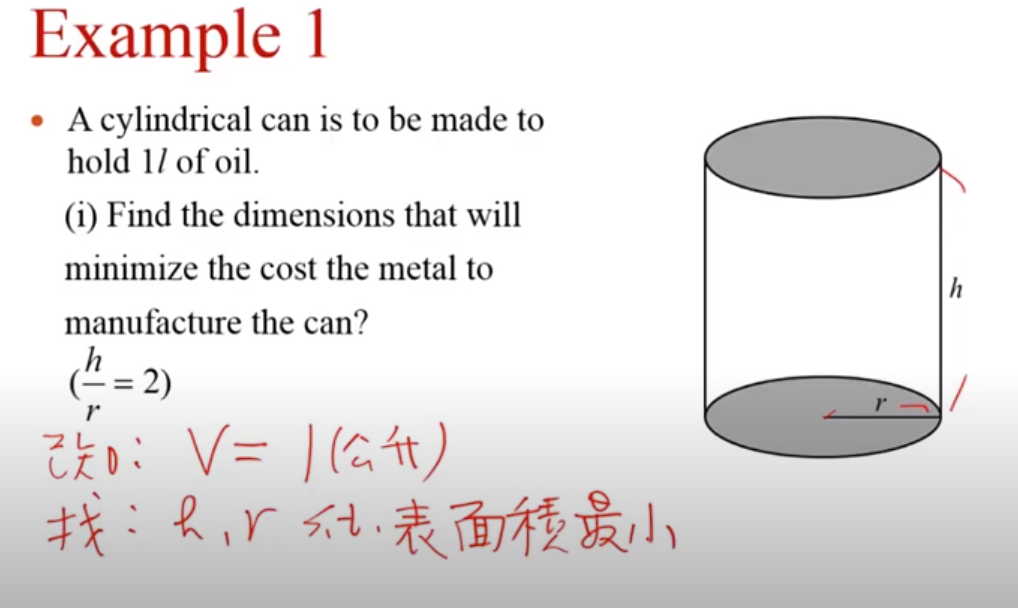

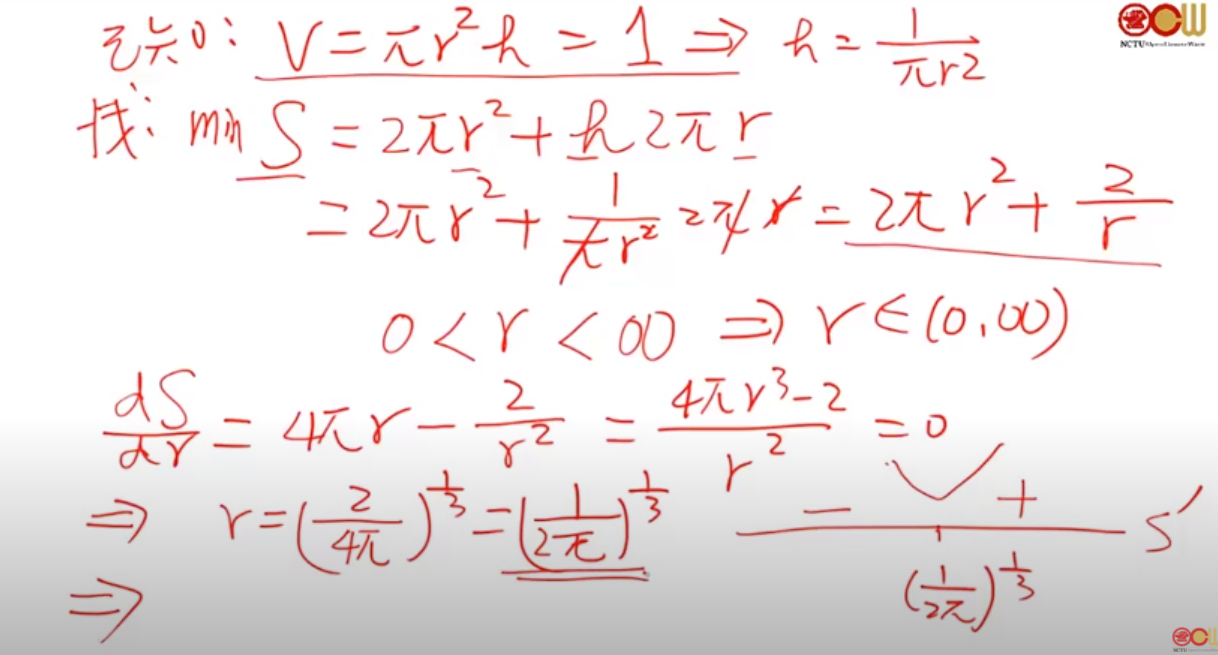

# Answer

In [2]:
answer = (1/(2*pi))**(1/3)
f"answer is:{answer}"

'answer is:0.5419260701392891'

# def loss function

In [3]:
def L(r): 
  return 2*pi*np.power(r,2) + (2/r)

# Newton method and minGD method

In [4]:
gradL = grad(L)
gradL2 = grad(gradL)

def minNewton(x) : 
  return x - gradL(x)/gradL2(x)
def minGD(x,lr):
  return x - lr*gradL(x)

# Run

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


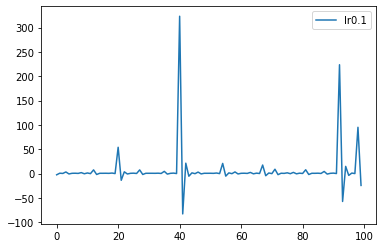

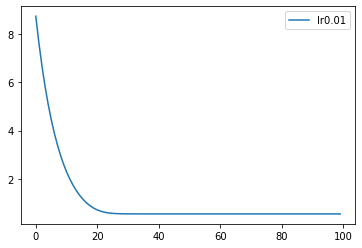

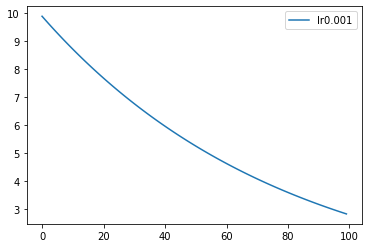

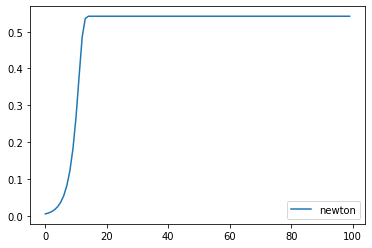

In [5]:
# 記錄用
history = {}
history['lr0.1'] = []
history['lr0.01'] = []
history['lr0.001'] = []
history['newton'] = []

# 梯度下降法
for lr in [0.1,0.01,0.001]:
  x = 10.0
  for epoch in tqdm(range(100)):
    x = minGD(x,lr)
    history["lr{}".format(lr)].append(x)

# 牛頓法
x = 10.0
for epoch in tqdm(range(100)):
  x = minNewton(x)
  history['newton'].append(x)

# 比較結果
for i in history.keys():
  plt.plot(history[i],label=i)
  plt.legend()
  plt.show()

In [6]:
for k,v in history.items():
  print(k,v[-1])

lr0.1 -24.398315
lr0.01 0.54192615
lr0.001 2.8299317
newton 0.5419261


# Answer

In [7]:
(1/(2*pi))**(1/3)

0.5419260701392891